
0: 288x192 1 Defective, 20.4ms
Speed: 0.0ms preprocess, 20.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 192)

0: 288x192 1 Defective, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 192)
Original Image Results:
Bounding Boxes: [[     105.97      52.377      362.74      637.58]]
Classes: [          0]
\nDecoded Image Results:
Bounding Boxes: [[     105.97      52.377      362.74      637.58]]
Classes: [          0]


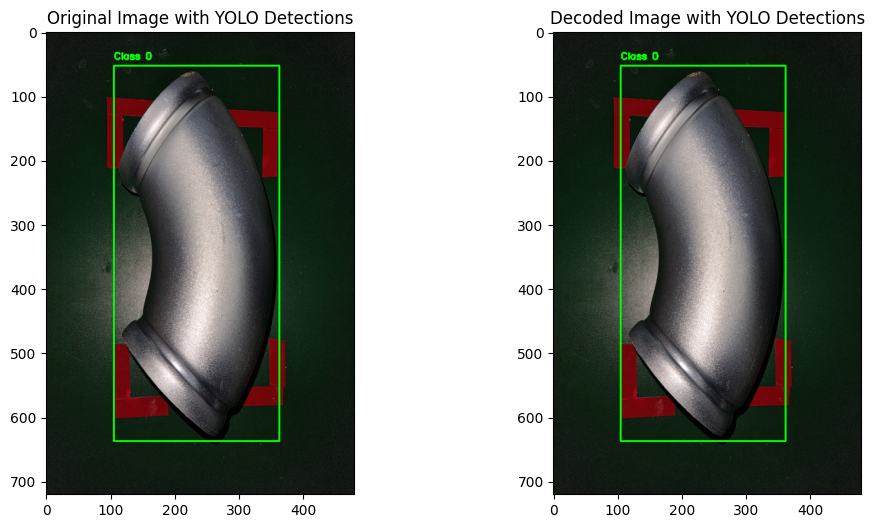

In [10]:
from ultralytics import YOLO
import cv2
import base64
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

# Function to encode an image to Base64 string
def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
    return encoded_string

# Function to decode a Base64 string back to an OpenCV image
def decode_base64_to_image(base64_str):
    try:
        image_data = base64.b64decode(base64_str)
        pil_image = Image.open(io.BytesIO(image_data)).convert("RGB")
        return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    except Exception as e:
        raise ValueError("Invalid base64 image data")

# Function to run YOLO on an image and return results
def run_yolo_on_image(model, image):
    results = model(image)  # Run inference
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes (x1, y1, x2, y2)
    classes = results[0].boxes.cls.cpu().numpy()  # Class labels
    return boxes, classes

# Load YOLO model (replace with your model path)
yolo_model = YOLO("C:/Users/gh159/runs/detect/yolov8_custom8/weights/best.pt")

# Step 1: Encode the original image to Base64
original_image_path = "C:\\Users\\gh159\\Desktop\\project\\raw_data\\resized\\정상\\KEMP_IMG_DATA_2.png"
base64_encoded = encode_image_to_base64(original_image_path)

# Step 2: Decode the Base64 string back to an OpenCV image
decoded_image = decode_base64_to_image(base64_encoded)

# Step 3: Load the original image for comparison
original_image = cv2.imread(original_image_path)

# Step 4: Run YOLO on both images
original_boxes, original_classes = run_yolo_on_image(yolo_model, original_image)
decoded_boxes, decoded_classes = run_yolo_on_image(yolo_model, decoded_image)

# Step 5: Compare results
print("Original Image Results:")
print("Bounding Boxes:", original_boxes)
print("Classes:", original_classes)

print("\\nDecoded Image Results:")
print("Bounding Boxes:", decoded_boxes)
print("Classes:", decoded_classes)

# Step 6: Visualize the results (optional)
def draw_boxes(image, boxes, classes):
    for box, cls in zip(boxes, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {int(cls)}"
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Add label

# Draw bounding boxes on images
original_with_boxes = original_image.copy()
decoded_with_boxes = decoded_image.copy()
draw_boxes(original_with_boxes, original_boxes, original_classes)
draw_boxes(decoded_with_boxes, decoded_boxes, decoded_classes)

# Display images with bounding boxes using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Original Image with YOLO Detections")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(decoded_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Decoded Image with YOLO Detections")

plt.show()
